In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp

In [3]:
TCMB = 2.7255  # Kelvin
hplanck = 6.626070150e-34  # MKS
kboltz = 1.380649e-23  # MKS

In [100]:
def powerlaw(ell, beta):
    return (ell / 80.)**beta

In [5]:
def normed_cmb_thermo_units(nu):
    X = hplanck * nu / (kboltz * TCMB)
    eX = np.exp(X)
    return eX * X**4 / (eX - 1.)**2

In [6]:
def normed_synch(nu, beta):
    nu0 = 2.3e9
    if beta is not np.array:
        beta = np.array(beta)
    return (nu/nu0)**(2.+beta[..., np.newaxis])

In [7]:
def scale_synch(nu, beta):
    unit = normed_synch(nu, beta) * normed_cmb_thermo_units(2.3e9) / normed_cmb_thermo_units(nu)
    return unit

In [8]:
A_BB = 1.7e3
alpha_BB = -3.0
beta_BB = -3.2

In [101]:
nside = 128

In [102]:
ells = np.arange(385)

In [103]:
pcls = A_BB * powerlaw(ells, alpha_BB)
pcls[0] = 0
pcls[1] = 0

/Data/abitbol/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


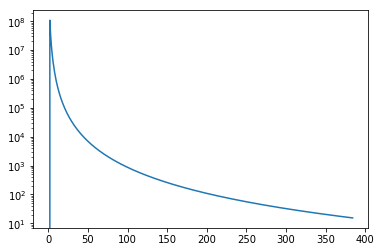

In [12]:
semilogy(ells, pcls)

In [13]:
sbb = hp.synfast(pcls, nside)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Data/abitbol/anaconda3/envs/myenv/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


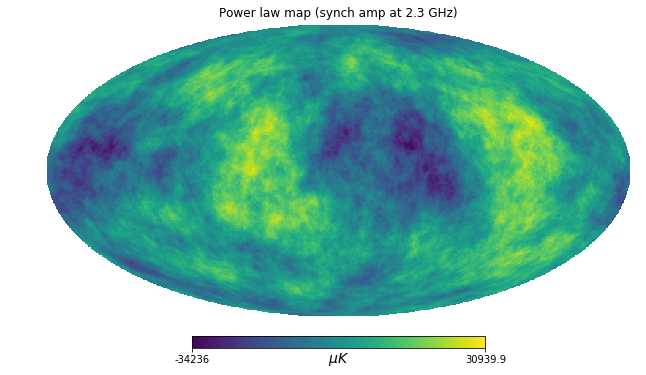

In [14]:
hp.mollview(sbb, unit='$\mu K$', title='Power law map (synch amp at 2.3 GHz)')

In [15]:
check_cls = hp.anafast(sbb)

(1, 100000000.0)

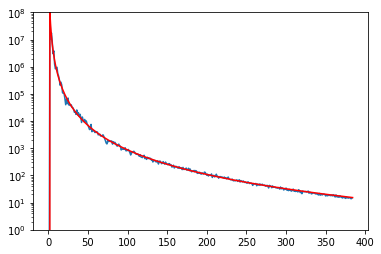

In [16]:
semilogy(ells[:-1], check_cls)
semilogy(ells, pcls, 'r')
ylim(1, 1e8)

In [17]:
freqs = np.linspace(10, 200, 20)*1.e9

In [18]:
sed_scaling = scale_synch(freqs, beta_BB)

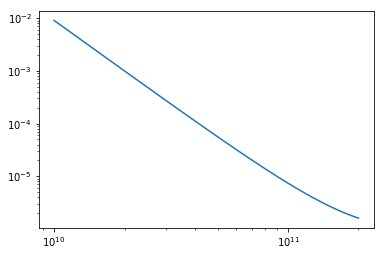

In [19]:
loglog(freqs, sed_scaling)

In [20]:
newmaps = sbb * sed_scaling[..., np.newaxis]

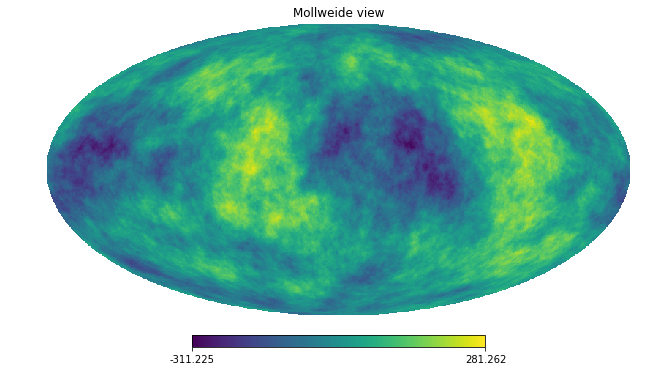

In [21]:
hp.mollview(newmaps[0])

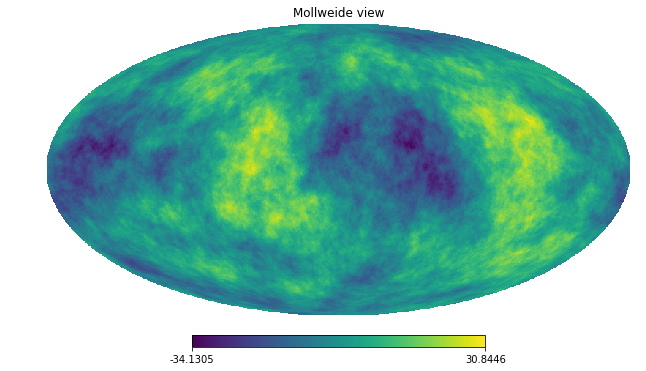

In [23]:
hp.mollview(newmaps[1])

In [24]:
beta_sigma = 1.5e-6
beta_cls = beta_sigma * np.ones_like(ells)

In [25]:
beta_map = hp.synfast(beta_cls, nside)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [26]:
beta_map -= np.mean(beta_map) + 3.2

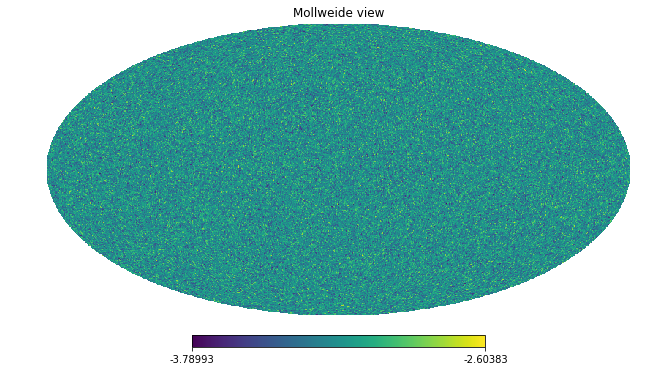

In [27]:
hp.mollview(beta_map)

In [28]:
check_bcls = hp.anafast(beta_map)

In [29]:
np.mean(beta_map)

-3.1999999999999993

In [30]:
np.sqrt(check_bcls[0]/(4*pi))

3.1999984971696342

(1e-07, 1e-05)

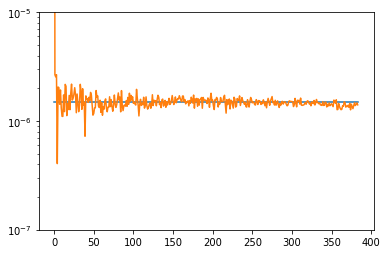

In [31]:
semilogy(ells, beta_cls)
semilogy(ells[:-1], check_bcls)
ylim(1e-7, 1e-5)

In [32]:
new_sed_scaling = scale_synch(freqs, beta_map)

In [33]:
np.mean(new_sed_scaling, axis=0)

array([9.26560166e-03, 1.03894506e-03, 2.92446750e-04, 1.20234912e-04,
       6.09524461e-05, 3.53344669e-05, 2.25006475e-05, 1.53656310e-05,
       1.10795812e-05, 8.34633018e-06, 6.51864358e-06, 5.24866614e-06,
       4.33798446e-06, 3.66772432e-06, 3.16366362e-06, 2.77780278e-06,
       2.47814860e-06, 2.24281171e-06, 2.05647155e-06, 1.90819144e-06])

In [34]:
sed_scaling

array([9.09058804e-03, 9.96917854e-04, 2.75906198e-04, 1.11883289e-04,
       5.60597183e-05, 3.21683571e-05, 2.02993352e-05, 1.37490963e-05,
       9.83990743e-06, 7.36140343e-06, 5.71258846e-06, 4.57211865e-06,
       3.75756966e-06, 3.16012433e-06, 2.71211447e-06, 2.36994235e-06,
       2.10464855e-06, 1.89648157e-06, 1.73165616e-06, 1.60035599e-06])

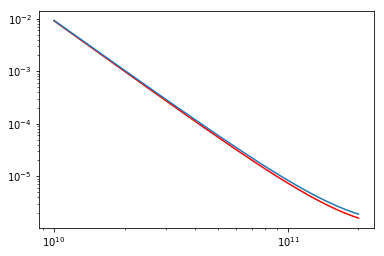

In [35]:
loglog(freqs, sed_scaling, 'r')
loglog(freqs, np.mean(new_sed_scaling, axis=0))

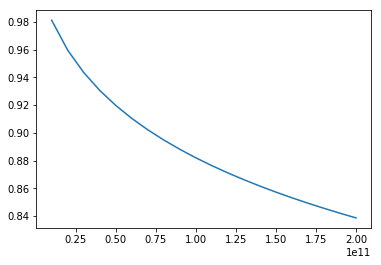

In [41]:
plot(freqs, sed_scaling / np.mean(new_sed_scaling, axis=0))

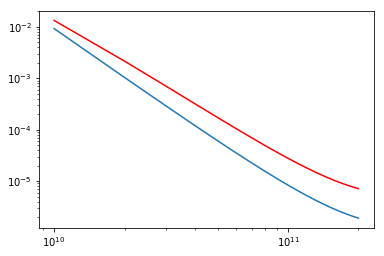

In [37]:
loglog(freqs, sed_scaling * np.log(freqs/2.3e9), 'r')
loglog(freqs, np.mean(new_sed_scaling, axis=0))

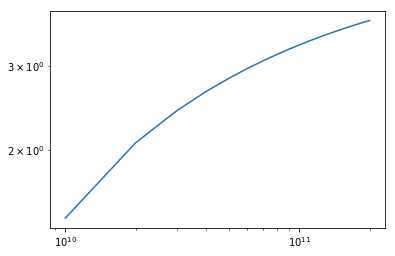

In [38]:
loglog(freqs, sed_scaling * np.log(freqs/2.3e9) / np.mean(new_sed_scaling, axis=0))

In [39]:
sed_scaling * np.log(freqs/2.3e9) / np.mean(new_sed_scaling, axis=0)

array([1.44191595, 2.07533304, 2.42302795, 2.65759212, 2.83194962,
       2.96919776, 3.08142811, 3.17573411, 3.25661786, 3.32710723,
       3.38933132, 3.44484112, 3.49479945, 3.54009923, 3.58144005,
       3.61937961, 3.65436914, 3.68677858, 3.71691471, 3.74503454])

In [40]:
# well thats not good

In [48]:
from scipy.stats import kstest, norm

In [74]:
np.std(beta_map)

0.13289822215466315

In [76]:
x = np.linspace(-3.8, -2.6)
y = norm(-3.2, 0.133)

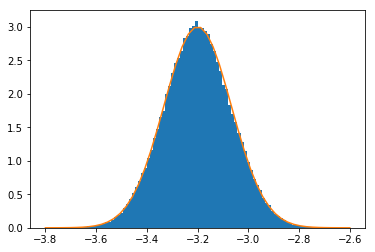

In [82]:
hist(beta_map, bins=100, density=True);
plot(x, y.pdf(x))

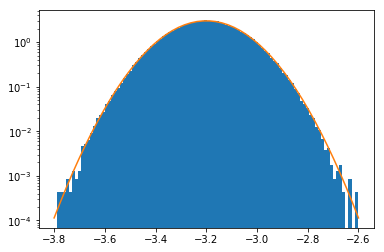

In [81]:
hist(beta_map, bins=100, density=True);
plot(x, y.pdf(x))
yscale('log')

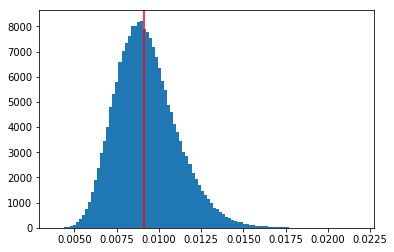

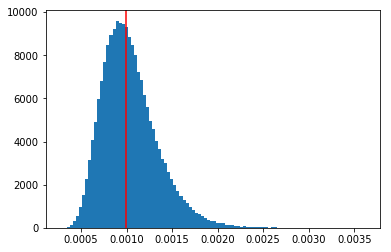

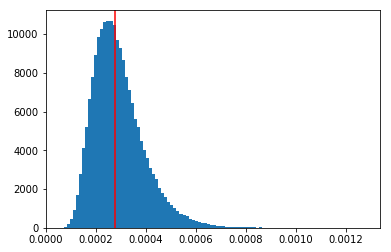

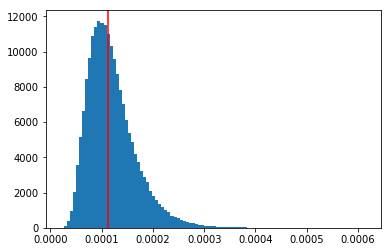

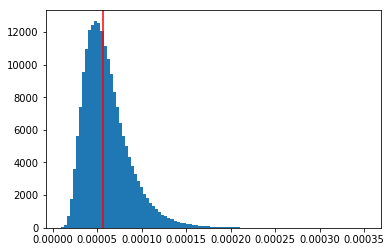

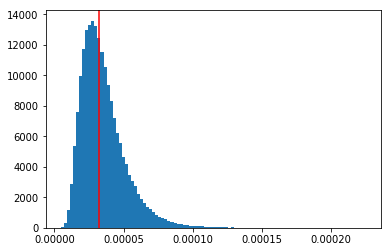

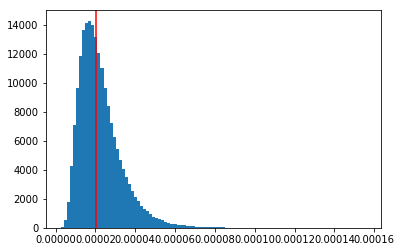

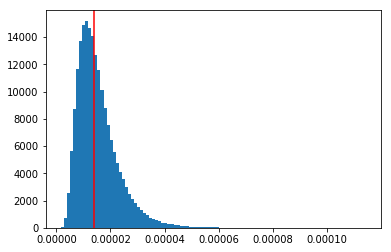

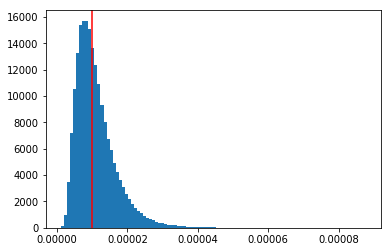

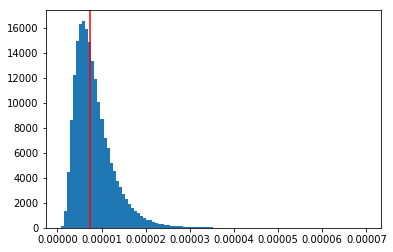

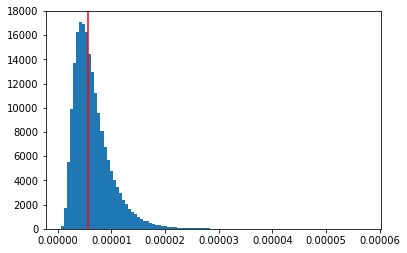

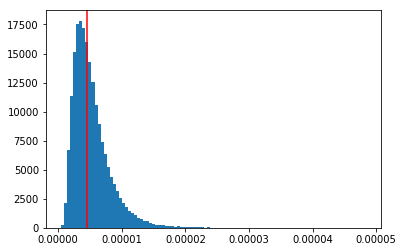

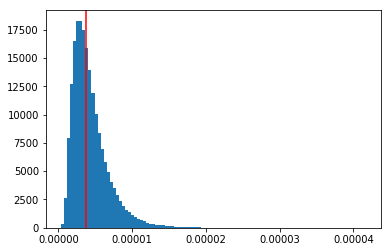

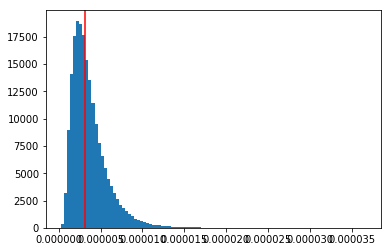

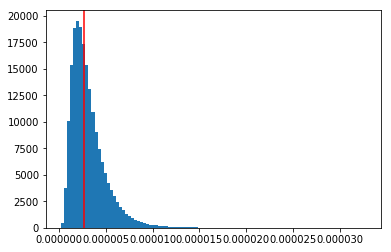

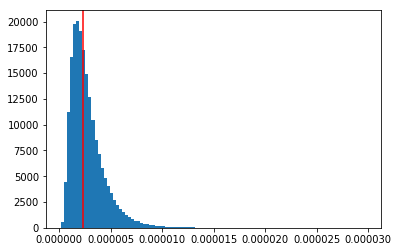

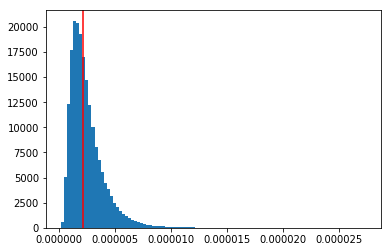

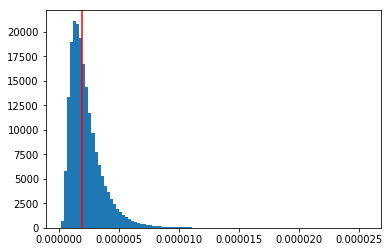

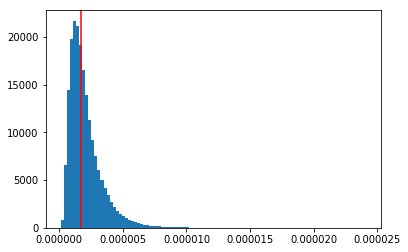

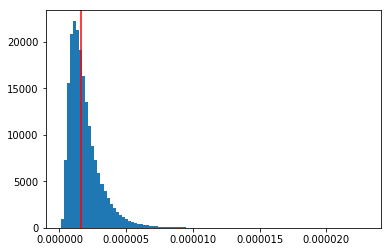

In [83]:
for k in range(20):
    figure()
    hist(new_sed_scaling[:, k], bins=100);
    axvline(sed_scaling[k], color='r')

In [84]:
x = (sbb[..., np.newaxis] * new_sed_scaling).T

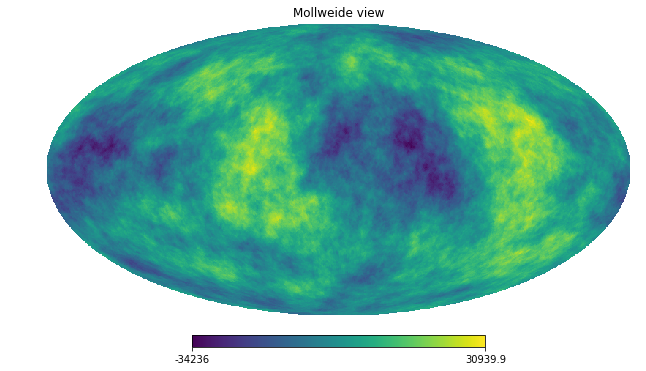

In [85]:
hp.mollview(sbb)

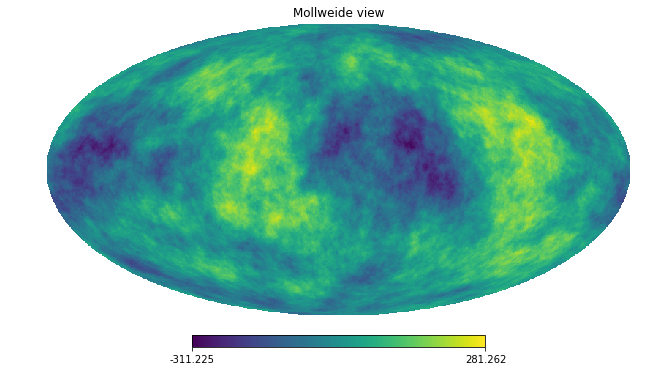

In [86]:
hp.mollview(newmaps[0])

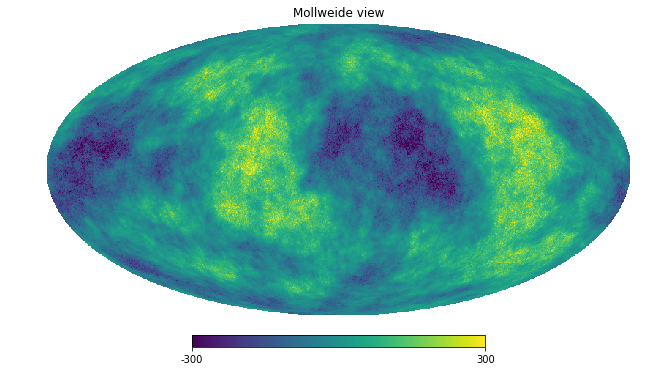

In [88]:
hp.mollview(x[0], min=-300, max=300)

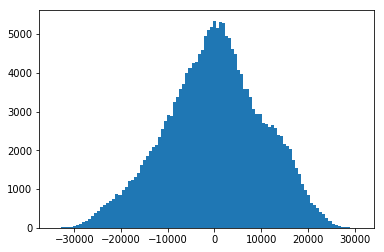

In [89]:
hist(sbb, bins=100);

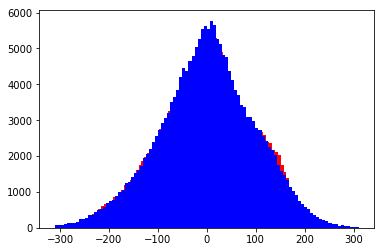

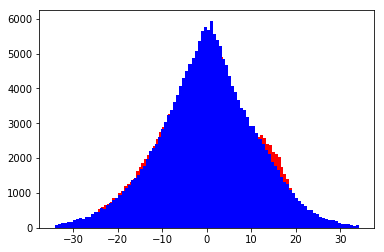

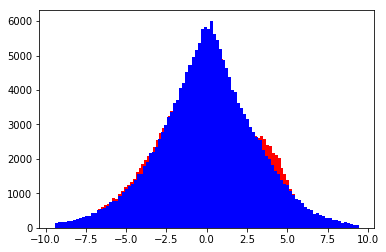

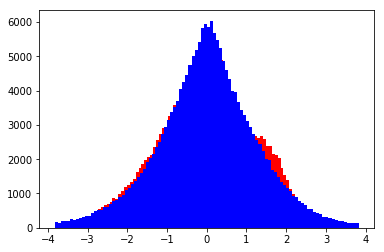

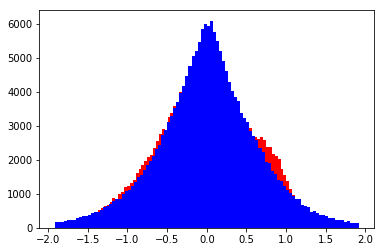

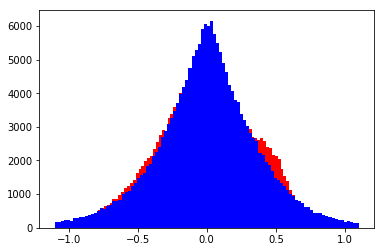

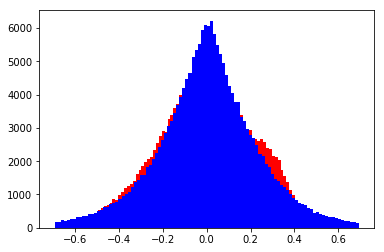

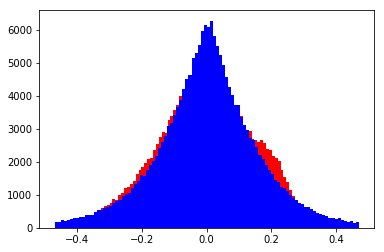

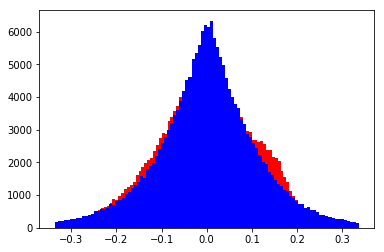

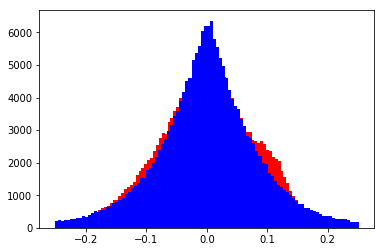

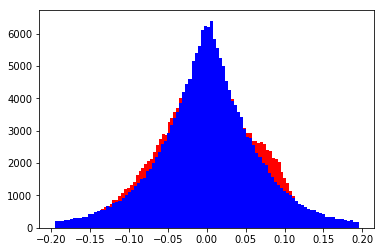

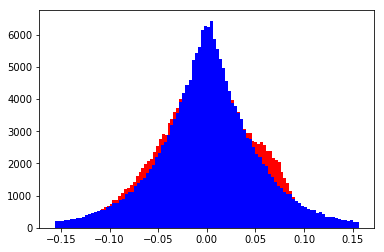

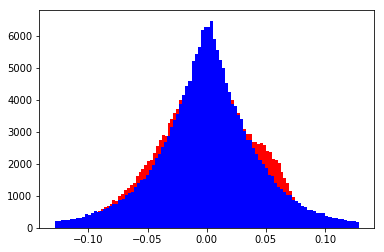

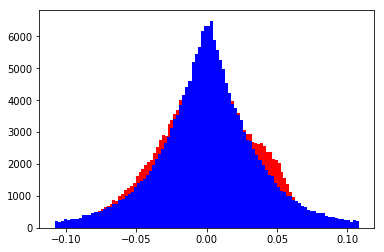

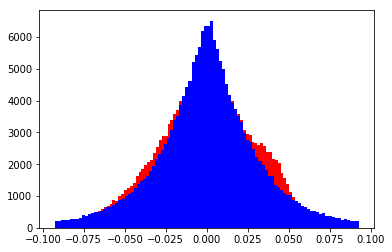

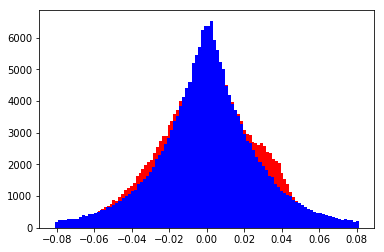

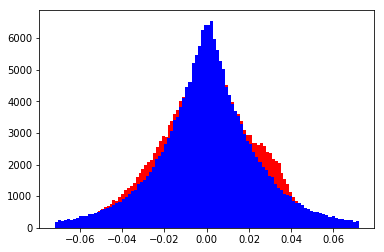

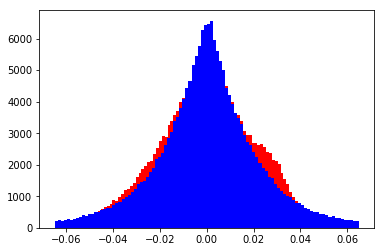

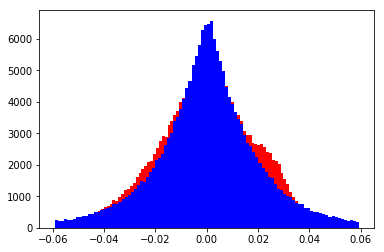

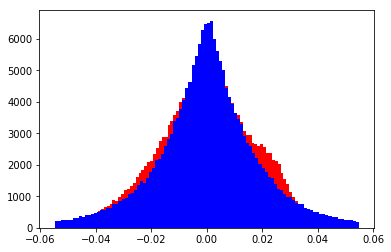

In [90]:
for k in range(20):
    figure()
    xmask = np.abs(x[k]) < np.abs(newmaps[k]).max()
    hist(newmaps[k], bins=100, color='r');
    hist(x[k][xmask], bins=100, color='b');

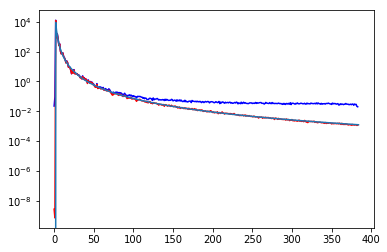

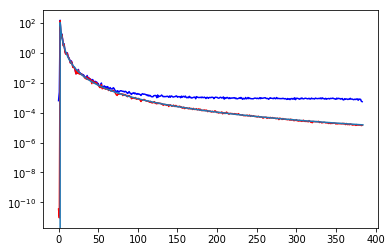

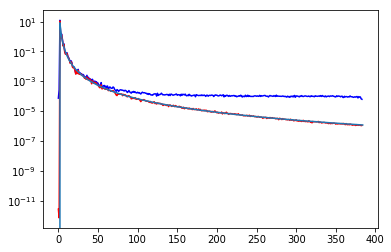

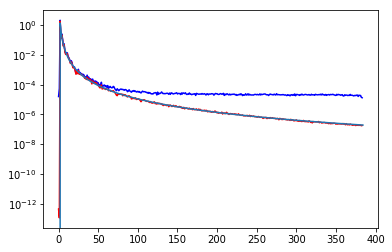

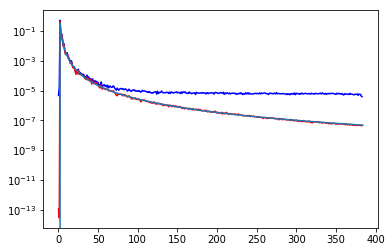

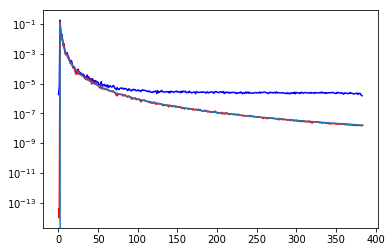

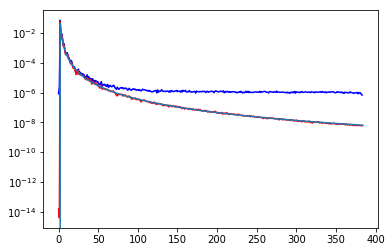

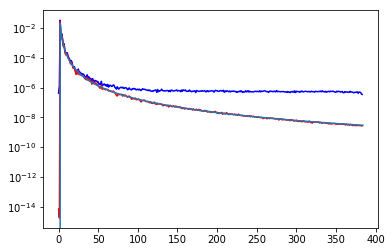

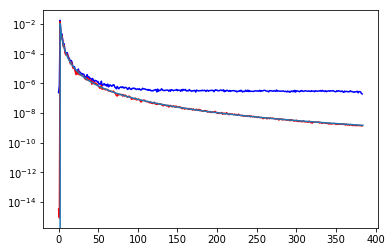

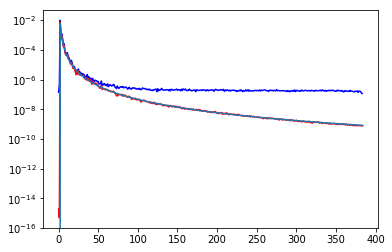

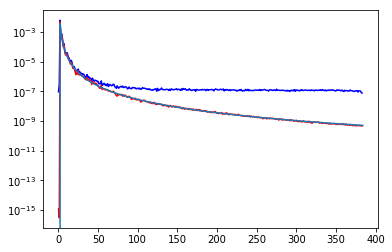

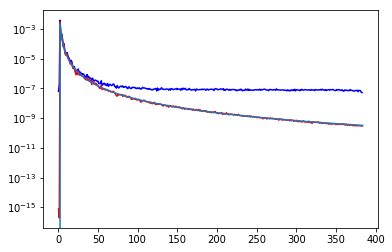

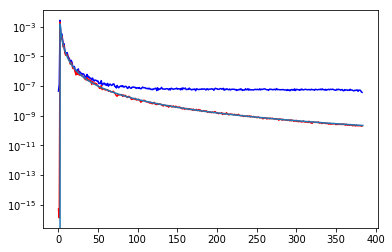

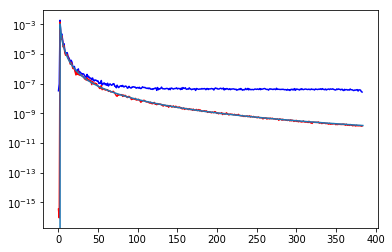

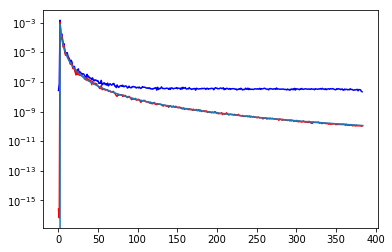

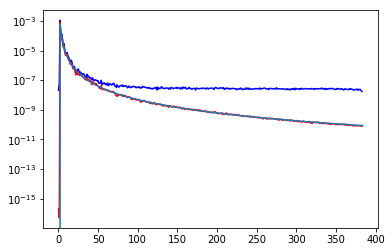

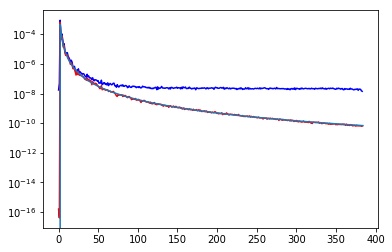

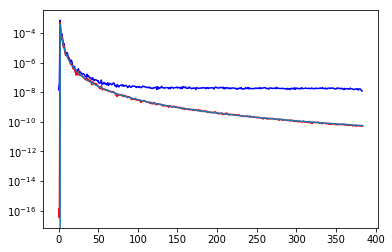

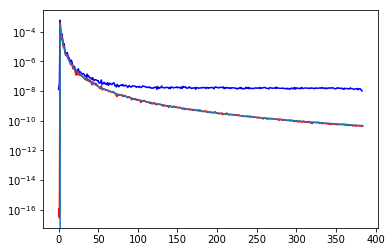

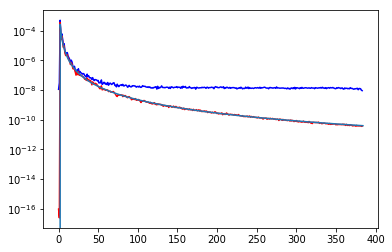

In [118]:
for k in range(20):
    figure()
    newcls = hp.anafast(x[k])
    oldcls = hp.anafast(newmaps[k])
    semilogy(newcls, 'b')
    semilogy(oldcls, 'r')
    semilogy(ells, pcls*sed_scaling[k]**2)

In [92]:
from pyshtools.utils import Wigner3j

In [255]:
total = np.zeros(800)
for ell1 in ells[1:]:
    for ell2 in ells[1:]:
        w3j, ellmin, ellmax = Wigner3j(ell1, ell2, 0, 0, 0 )
        indexmax = np.where(w3j!=0)[0][-1] + 1
        ellmax += 1
        norm = (2. * ell1 + 1) * (2. * ell2 + 1) / (4*pi)
        total[ellmin:ellmax] = total[ellmin:ellmax] + norm * w3j[:indexmax]**2 * powerlaw(ell1, alpha_BB) * 1.5e-6

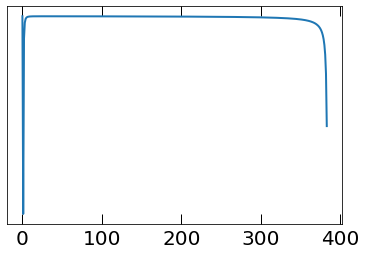

In [256]:
semilogy(total[:384])

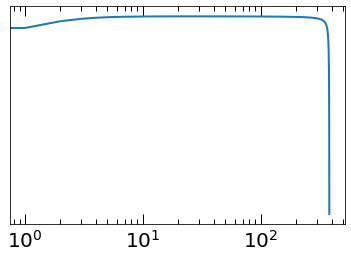

In [258]:
loglog(total[2:384])

In [259]:
np.mean(total[10:100]) * A_BB 

466.11659932120557

In [241]:
total = np.zeros(800)
for ell1 in ells[1:-1]:
    for ell2 in ells[1:-1]:
        w3j, ellmin, ellmax = Wigner3j(ell1, ell2, 0, 0, 0 )
        indexmax = np.where(w3j!=0)[0][-1] + 1
        ellmax += 1
        norm = A_BB * (2 * ell1 + 1) * (2 * ell2 + 1) / (4*pi)
        total[ellmin:ellmax] = total[ellmin:ellmax] + norm * w3j[:indexmax]**2 * powerlaw(ell1, alpha_BB) * check_bcls[ell2]

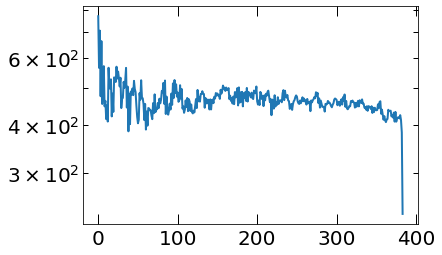

In [242]:
semilogy(total[:384])

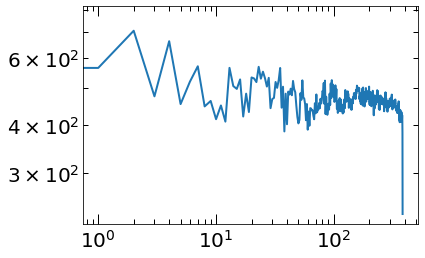

In [243]:
loglog(total[:384])

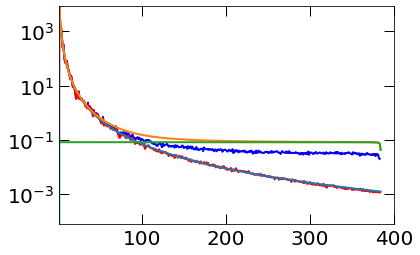

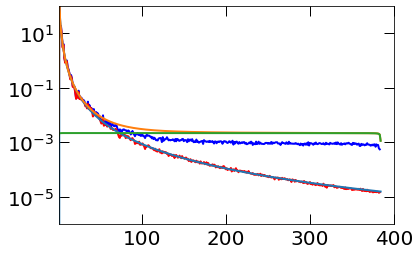

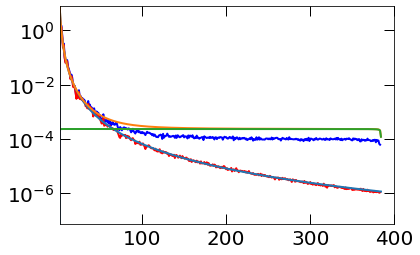

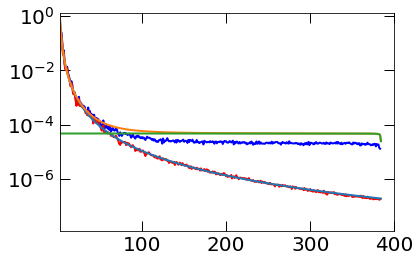

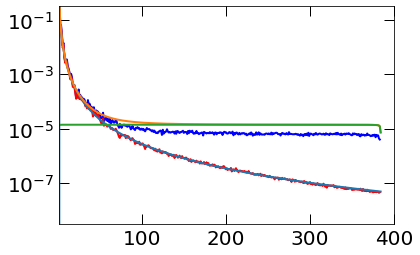

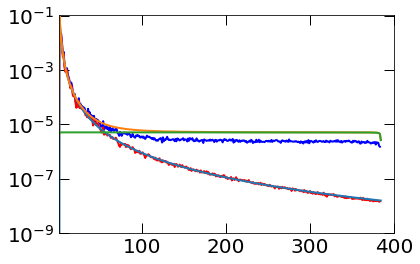

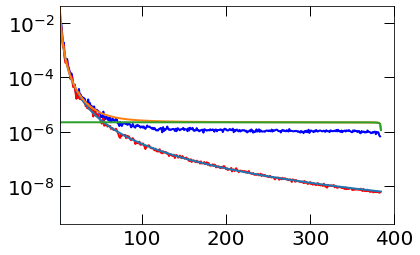

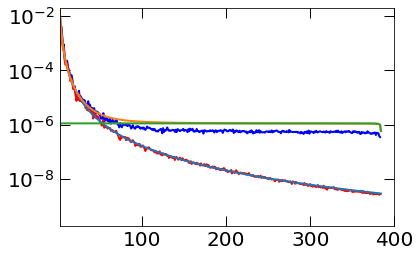

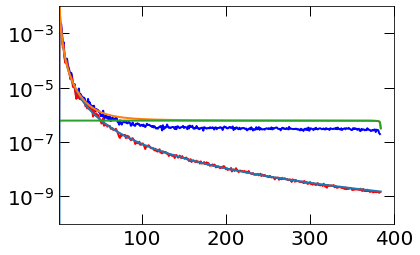

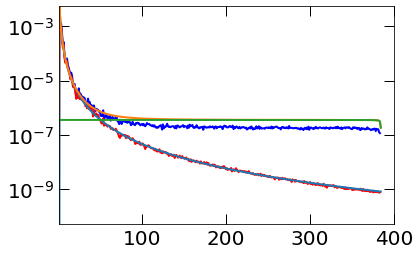

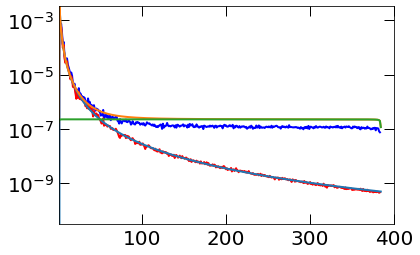

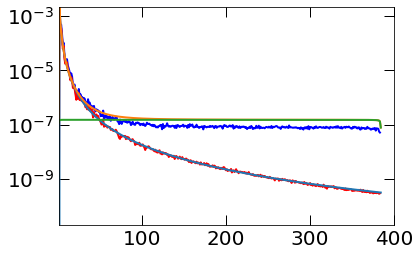

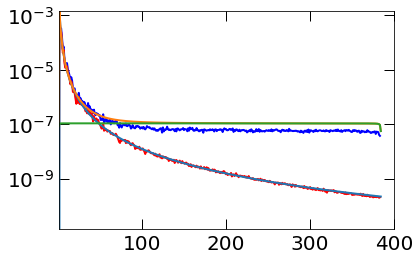

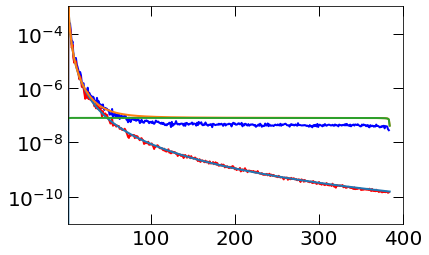

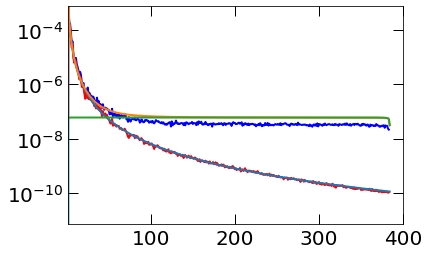

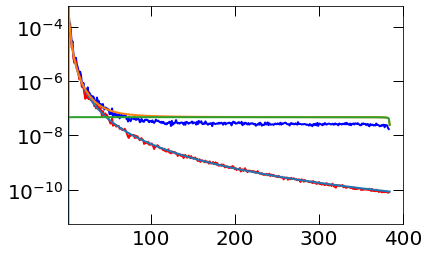

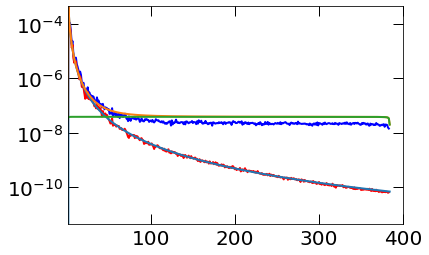

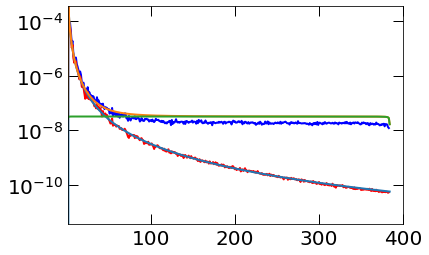

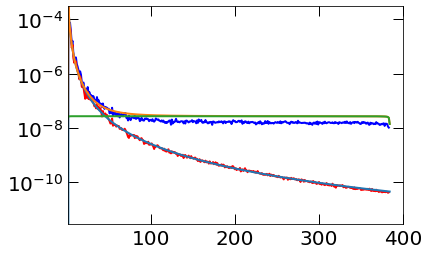

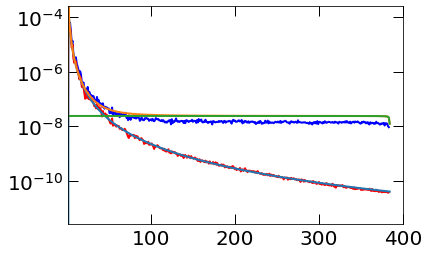

In [253]:
for k in range(20):
    figure()
    newcls = hp.anafast(x[k])
    oldcls = hp.anafast(newmaps[k])
    semilogy(newcls, 'b')
    semilogy(oldcls, 'r')
    semilogy(ells, pcls*sed_scaling[k]**2)
    moment1x1 = log(freqs[k]/2.3e9)**2 * sed_scaling[k]**2 * total[:385] * A_BB 
    semilogy(ells, moment1x1 + pcls*sed_scaling[k]**2)
    semilogy(ells, moment1x1)
    xlim(2, 400)
    ylim(1*sed_scaling[k]**2, 1e8 *sed_scaling[k]**2)

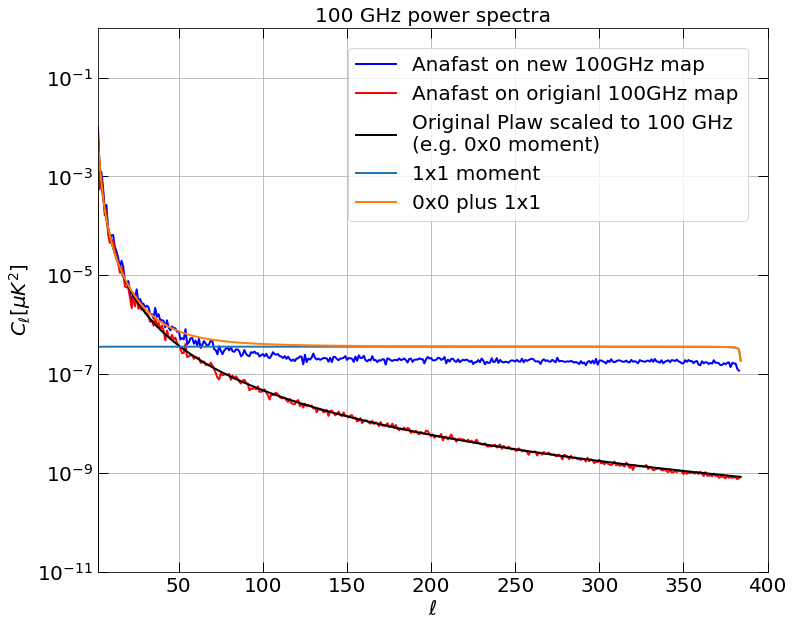

In [239]:
k = 9
figure(figsize=(12, 10))
newcls = hp.anafast(x[k])
oldcls = hp.anafast(newmaps[k])
semilogy(newcls, 'b', label='Anafast on new 100GHz map')
semilogy(oldcls, 'r', label='Anafast on origianl 100GHz map')
semilogy(ells, pcls*sed_scaling[k]**2, label='Original Plaw scaled to 100 GHz \n(e.g. 0x0 moment)', color='k')

moment1x1 = log(freqs[k]/2.3e9)**2 * sed_scaling[k]**2 * total[:385]
semilogy(ells, moment1x1, label='1x1 moment')
semilogy(ells, moment1x1 + pcls*sed_scaling[k]**2, label='0x0 plus 1x1')
xlim(2, 400)
ylim(1e-11, 1e0)
legend()
grid()
ylabel("$C_{\ell} [\mu K^2]$")
xlabel("$\ell$", fontsize=20)
title('100 GHz power spectra')
#savefig('moments_almost.pdf', format='pdf', dpi=300)

In [236]:
rcParams['lines.linewidth'] = 2
    
lsize = 20
rcParams['xtick.labelsize'] = lsize
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 5
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1
rcParams['xtick.bottom'] = True
rcParams['xtick.top'] = True
rcParams['xtick.direction'] = 'in'


rcParams['ytick.labelsize'] = lsize
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1
rcParams['ytick.left'] = True
rcParams['ytick.right'] = True
rcParams['ytick.direction'] = 'in'


rcParams['legend.fontsize'] = lsize
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = lsize
rcParams['axes.titlesize'] = lsize

In [260]:
total2 = A_BB * powerlaw(ells, alpha_BB) * np.sum( (2. * ells + 1) * beta_cls)
total2[0] = 0
total2[1] = 0

/Data/abitbol/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


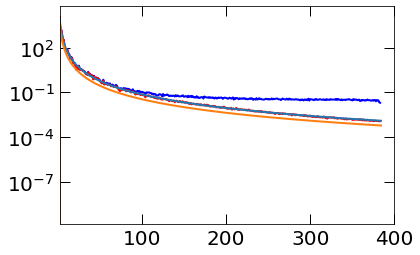

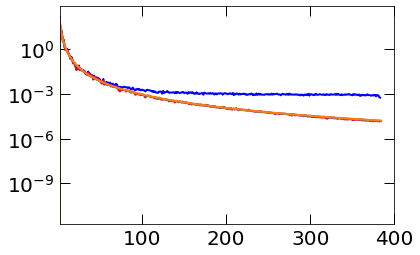

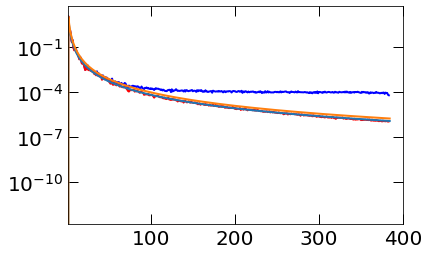

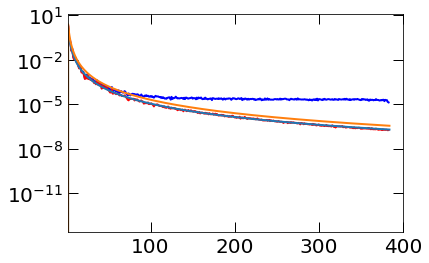

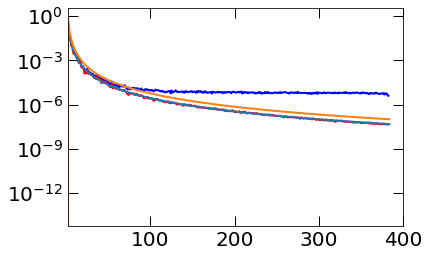

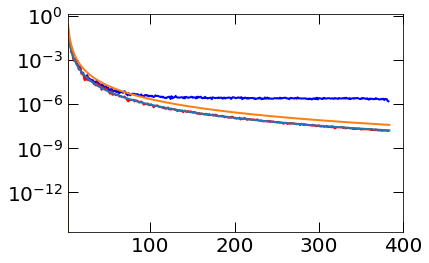

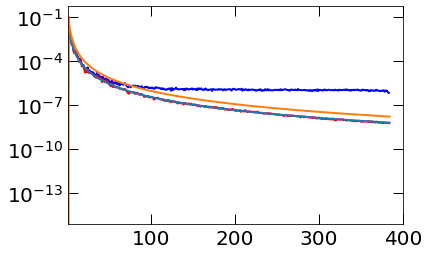

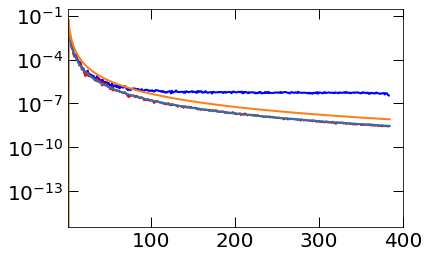

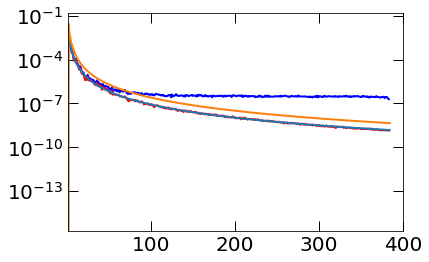

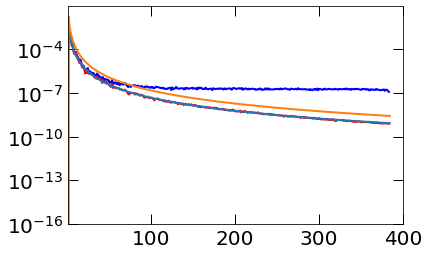

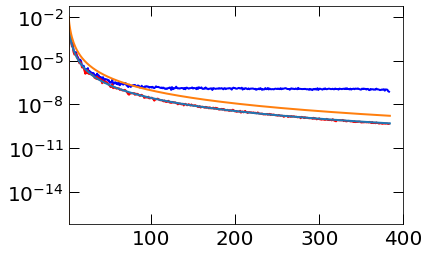

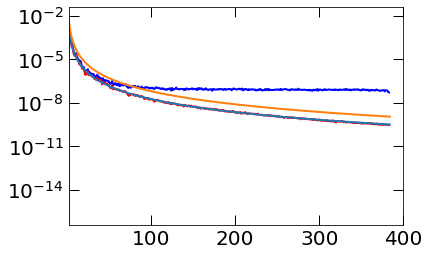

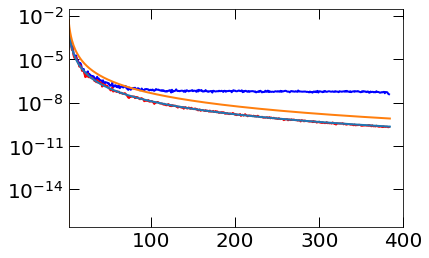

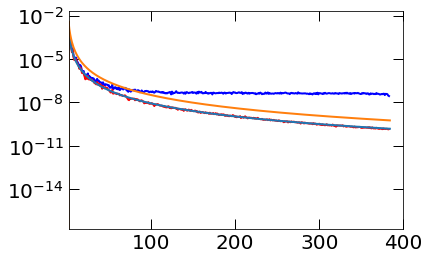

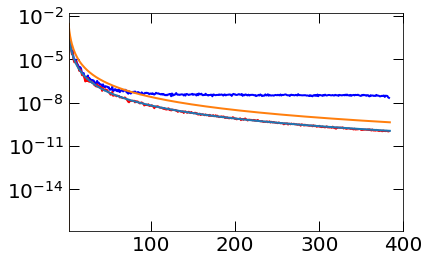

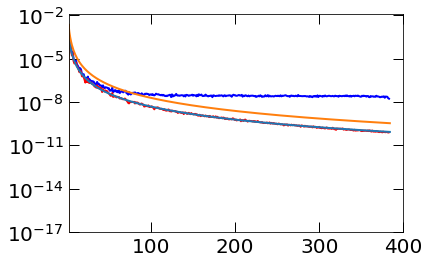

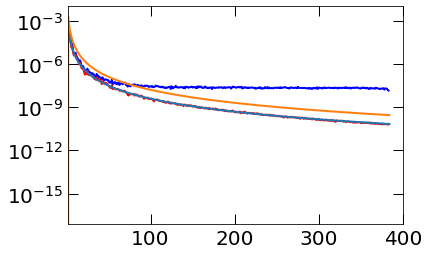

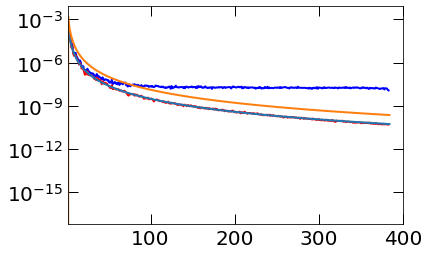

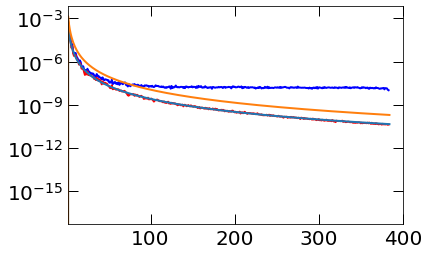

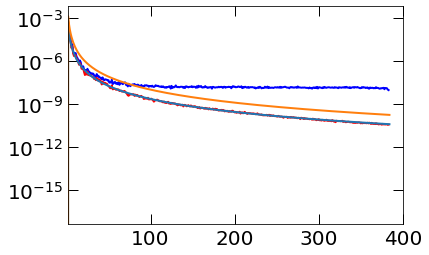

In [264]:
for k in range(20):
    figure()
    newcls = hp.anafast(x[k])
    oldcls = hp.anafast(newmaps[k])
    semilogy(newcls, 'b')
    semilogy(oldcls, 'r')
    semilogy(ells, pcls*sed_scaling[k]**2)
    
    #moment1x1 = log(freqs[k]/2.3e9)**2 * sed_scaling[k]**2 * total[:385] * A_BB 
    #semilogy(ells, moment1x1 + pcls*sed_scaling[k]**2)
    semilogy(ells, total2 * log(freqs[k]/2.3e9)**2 *sed_scaling[k]**2)
    
    xlim(2, 400)
    #ylim(1*sed_scaling[k]**2, 1e8 *sed_scaling[k]**2)